<h1 align='center'> Integrated Project # 1 </h1> 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 10px; margin-bottom:0px;">

<font size = 3.5>

1. <a href="#item 1">Introduction</a><br/>
2. <a href="#item 2">Data Wrangling</a> <br/>
3. <a href="#item 3">Data Analyses</a><br/>
4. <a href="#item 4">Hypotheses Tests</a><br/>
5. <a href="#item 5">Conclusions</a>

# 1. Introduction

<a id='item 1'></a>
<p>
Ice a video game e-commerce is interesting in determining whether a game succeeds or not. The information gathered will be used to put money on a potentially hot new item and plan advertising campaigns. As such, it is the purpose of this exploratory analyses is to identify patterns that determine whether a game succeeds or not. 

## 1.2 Libraries Used

In [105]:
import pandas as pd #data preprocessing and analyses

import matplotlib as mpl#visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns 
import joypy

import numpy as np #numerical analyses
from scipy import stats as st

## 1.3 Data Source

You can find the dataset used <a href='https://code.s3.yandex.net/datasets/games.csv'>here</a> or <a href=''>here.</a>The dataset consists of user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales. In particular, the data set contains the abbreviation ESRB (Entertainment Software Rating Board). The ESRB evaluates a game's content and assigns an appropriate age categories, such as Teen and Mature.

<p><b><u>Data Description</u></b>
    
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

## 1.4 Initial Exploration

We'll start by loading in and examining the dataset.

In [106]:
games = pd.read_csv(r"C:\Users\garci\Downloads\games.csv") #loading dataset

#games.drop(columns='Unnamed: 0', inplace=True) #drop dummy column (might be different on practicum platform)

In [107]:
print(games.shape) #tuple with rows,columns of dataframe
games.sample(5) #display five random rows from the dataframe

(16715, 11)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3831,Tales of Symphonia: Dawn of the New World,Wii,2008.0,Role-Playing,0.21,0.04,0.24,0.02,68.0,7.1,T
4616,How to Train Your Dragon,Wii,2010.0,Action,0.23,0.15,0.00,0.04,59.0,7,E10+
9157,Dream Pinball 3D,Wii,2008.0,Misc,0.10,0.02,0.00,0.01,54.0,7.6,E10+
8925,Toy Story Racer,PS,2001.0,Racing,0.08,0.06,0.00,0.01,76.0,8.7,E
325,Tom Clancy's The Division,PS4,2016.0,Shooter,1.35,1.70,0.15,0.60,80.0,7,M


Our dataframe consists of 16,715 rows and a total of 11 columns. Given the sample method used, it seems likly that the data falls around the mid-2000s. Also, it does seem to contain some null values in the critic and user scor, and rating columns. Let's get a better view of this by using the <b>.info()</b> method.

In [108]:
games.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Here we find that there are a good chunk of null values for the critic and user score, and the rating column. We can also note that the user score column is of of type object which will need to be converted to an integer type. In addition, the name, genre, and year columns contain a small amount of null values. 

Let's now take a look at our continuous variables by using the <b>.describe()</b> Pandas method which will output relevant descriptive statistics information per column.

In [109]:
games.describe()  

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


The average year for the data is at 2006 with half the data coming from the year 2003 to 2010 and spanning from the years 1980 to 2016. NA sales seem to have mean sale of \\$263,000 per game, however, this figure is skewed to the right given it's median of \\$80,000. EU sales follow a similar pattern with a mean of \\$145,000 but a median of \\$20,000. On the other hand, JP sales have a median of \\$0 and  mean \\$77,000 and sales from any other regions have a \\$47,000 mean and \\$10,000 median of sales per game. 

Overall though, the NA region is the leader in terms of games sold followed by the EU regions. Many factors could have impacted this. Most likely though, it may be that some platforms didn't release games in those areas and thus contributed to the central tendencies. Lastly, it should be noted that the other regions encompass many countries, while Japan doesn't. It may be that their figures are relatively large which explains as to why they were seperated into their own column/parameter. 

Let's now turn our attention toward the categorical variables by calling the same <b>.describe()</b> method but this time passing the 'object' as an argument. This will return relevant statistical information for the variables.

In [110]:
games.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


From the output, there are 11,559 unique games with about 500 of them being duplicate in terms of their names. This may be due to the game being released for more than one year due to its popularity. From the 31 platforms, PS2 has had the highest amount of games released (2,161) in it's platform. The most occuring genre, user score, and rating for the games come from Action games, a user score of 'tbd', and a rating of E (for everyone). It makes sense as to why the user score is an object type, we'll keep this in mind for the preprocessing step. 

Lastly, to check for the null values in our dataframe as well as other common missing vlaues, we'll create a function that: takes each column, looks through each of its row values, and returns the percentage of identified missing values if any null values were found in that column.

In [111]:
def missing_values(data):
    miss = {} #dictionary w/ column, type, and % of missing values 
    if len(data.columns) <=0: print('Something went wrong. No columns detected.')
        
    #iterate through all columns in dataset to search for each defined missing value   
    for i in data.columns: 
        if len(data[data[i].isnull()==True]) > 1:
            miss[i] = 'Null values '+str(round(len(data[data[i].isnull()==True]) / len(data)*100,2))
        if len(data[data[i] == 0]) > 1: 
            miss[i] = 'Zero values '+ str(round(len(data[data[i] == 0]) / len(data)*100,2))
        try:
            if len(np.where(data[i] == '')) > 1: 
                miss[i] = 'Empty strings '+str(round(len(data[data[i] == '']) / len(data)*100,2))
        except: pass
        if np.issubdtype(data[i].dtype, np.number) and len(data[data[i] < 0]) > 1:
            miss[i] = 'Negative values ' + str(round(len(data[data[i] < 0 ]) / len(data)*100,2))
        try: 
            if len(data[data[i].str.lower.isin(['n/a' ,'na', 'an', 'n\a', '?'])]) >1:
                miss[i] = 'other null values present'
        except:
            if len(data[data[i].isin(['N/A','?','na','Na','N/a'])]) > 1: 
                miss[i] = 'other null values present'
                
    return sorted(miss.items(), key=lambda x: float(miss[x[0]].split(' ')[-1]), reverse=True) 

In [112]:
missing_values(games)

C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[('JP_sales', 'Zero values 62.9'),
 ('Critic_Score', 'Null values 51.32'),
 ('Rating', 'Null values 40.48'),
 ('User_Score', 'Null values 40.09'),
 ('Other_sales', 'Zero values 39.49'),
 ('EU_sales', 'Zero values 35.12'),
 ('NA_sales', 'Zero values 26.97'),
 ('Year_of_Release', 'Null values 1.61'),
 ('Name', 'Null values 0.01'),
 ('Genre', 'Null values 0.01')]

### Conclusion

The data or the games released span from the year of 1980 to 2016 with about 50% coming from relatively recent years (2003 to 2010). NA sales and EU sales were found to have the highest yielding sales compared to the other two regions. The large differences across the four regions in terms of their sales can be roughly attributed to the 0 values present in their column; roughly 60% of 0 values for the JP region and roughly one third of missing values for the EU, NA, and other regions. It makes sense now as to why JP had a median sale of 0, however, without further information, we can't state any further hypotheses. We'll note this down and leave the 0 values as is. Lastly, as mentioned, many null values in the columns relating to the rating scores were found with a small number of null values present in the name, genre, and year columns. 

<a id='item 2'></a>
## 2. Data Preprocessing

Two main goals for this step will be convert the data to the required types, and take care of our null values since will be needed in our next step. In addition, a total sales column across the region will be calculated to be used for the data analysis step. 

In [113]:
games.columns#to copy and paste in next cell 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [114]:
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating'] #lowercase our columns

Let's get a quick overview of our null values using the <b>.isnull()</b> and <b>.any()</b> method to check for any null values in each row for each column

In [115]:
games.isnull().any()

name                True
platform           False
year_of_release     True
genre               True
NA_sales           False
EU_sales           False
JP_sales           False
other_sales        False
critic_score        True
user_score          True
rating              True
dtype: bool

Let's filter for the name missing values to check why it's so.

In [116]:
games[games['name'].isnull()==True] 

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Not many missing values, we'll drop since it's just two rows. We'll filter again for the null values and create a list of it's index. The list of the two indexes will be passed as arguments to the <b>.drop()</b> method which will drop the row.

In [117]:
to_drop = games[games['name'].isnull()==True].index.to_list()
games = games.drop(to_drop).reset_index(drop=True) #reset index to reflect the drop rows

Let's go to next null values in the year column. We'll print the unique values (<b>.unique</b> method) and number of missing values (using the <b>len</b> method) as well as print the 10 sample null values for that column in the dataframe (using <b>.sample(10)</b>).

In [118]:
print(games['year_of_release'].unique(), len(games[games['year_of_release'].isnull()]))
print(round(games.year_of_release.isnull().sum()/ len(games),2))
games[games['year_of_release'].isnull()].sample(10)

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.] 269
0.02


,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
14209,Sabre Wulf,GBA,NaN,Platform,0.02,0.01,0.00,0.00,75.0,8,E
8150,Otomedius Excellent,X360,NaN,Shooter,0.13,0.00,0.04,0.01,48.0,8.1,T
14140,Major League Baseball 2K8,PSP,NaN,Sports,0.03,0.00,0.00,0.00,63.0,tbd,E
2452,The Lord of the Rings: War in the North,X360,NaN,Action,0.52,0.24,0.00,0.08,61.0,7.4,M
1608,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.00,0.12,76.0,7.8,E10+
1537,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.00,0.27,73.0,7.4,E10+
2280,Namco Museum,XB,NaN,Misc,0.77,0.11,0.00,0.04,59.0,tbd,E
4126,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
1649,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
10611,My Healthy Cooking Coach,DS,NaN,Simulation,0.09,0.00,0.00,0.01,NaN,tbd,E


269 rows were found to be missing. With the sample it's not straightforward as to why this is.  We'll use the mean to fill in the null values given it's low % of null values.

In [119]:
mean_year = round(games['year_of_release'].mean())
print(mean_year)

games['year_of_release'].fillna(mean_year, inplace=True) 
print(games['year_of_release'].isnull().sum())

2006
0


We successfully filled in the missing year values with the median year 2006. Let's now check our progress regarding the null values.

In [120]:
games.isnull().any()

name               False
platform           False
year_of_release    False
genre              False
NA_sales           False
EU_sales           False
JP_sales           False
other_sales        False
critic_score        True
user_score          True
rating              True
dtype: bool

Again, let's get a quick overview of the missing values in the critic score.

In [121]:
print(round(games.critic_score.isnull().sum() / len(games) * 100,2))
games[games['critic_score'].isnull()].sample(10)

51.31


,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
6618,Scrabble,PS,1999.0,Misc,0.14,0.10,0.00,0.02,NaN,NaN,NaN
14753,Yahari Game Demo Ore no Seishun Love-Kome wa M...,PSV,2016.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
5079,Imagine: Party Babyz,Wii,2008.0,Simulation,0.33,0.02,0.00,0.03,NaN,6.1,E
2584,All Star Cheer Squad,Wii,2008.0,Sports,0.43,0.29,0.00,0.08,NaN,5.2,E
1860,Omerta: City of Gangsters,PS3,2011.0,Simulation,0.52,0.42,0.00,0.15,NaN,NaN,NaN
9355,Imagine: Fashion Designer,3DS,2011.0,Simulation,0.10,0.02,0.00,0.01,NaN,tbd,E
14506,Gensou Suikoden I & II,PSP,2006.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
10165,Yard Sale Hidden Treasures: Sunnyville,DS,2010.0,Puzzle,0.10,0.00,0.00,0.01,NaN,tbd,E10+
13006,Fate/Unlimited Codes Portable,PSP,2009.0,Fighting,0.00,0.00,0.05,0.00,NaN,NaN,NaN
16022,Gaku ? Ou: The Royal Seven Stars,PSP,2012.0,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN


Around 51% of the data from the critic scores column was found to be missing. 

We'll fill in those missing values with the assumption that the genre is the most closely representative of scores based on the available parameters. We'll use the <b>.groupby()</b> method and select the critic score column to retieve each genre's respective median critic score. Based on the null critic scores respective genre, the following will be used as replacement values:

In [122]:
print(games.groupby('genre')['critic_score'].median())

genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.0
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64


Now in order to fill out the missing values, we'll again group by the respective column but use the <b>.transform()</b> method inplace of the aggfunc; this will take all the null values from that column and based on their corresponding genre row, fill it in with it's appropriate median.

In [123]:
games['critic_score'].fillna(games.groupby(['genre'])['critic_score'].transform('median'),inplace=True)
games['critic_score'].isnull().sum() # sanity check

0

Nice, let's proceed to get an overview of the user score column now. 

In [124]:
print(round(games.user_score.isnull().sum() / len(games),2) *100)
games[games['user_score'].isnull()].head()

40.0


,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,70.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,73.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,70.0,NaN,NaN


40% of row values were found to be missing but again, without much information and for the purposes of this analysis, we'll proceed to fill it in with the median value. However, remembering the 'tbd' object, we'll have to take additional steps to do this. 


To fill in based on the median value, we'll need to retrieve the relevant median values. For that we'll use the following logic:
<ul>
    <li>convert all values in the user scores into a string and retrieve the numerical values only</li>
    <li>apply the above logic to filter for numericals only and then convert back into a float type</li>
    <li> from there group by and return the user score columns per genre </li>
    </ul>

In [125]:
transform_user= games[games['user_score'].astype(str).str.isdigit()\
    ].astype({'user_score':float}).groupby('genre')['user_score']
transform_user.median()

genre
Action          7.0
Adventure       8.0
Fighting        8.0
Misc            7.0
Platform        7.0
Puzzle          8.0
Racing          7.0
Role-Playing    8.0
Shooter         7.0
Simulation      7.5
Sports          7.0
Strategy        8.0
Name: user_score, dtype: float64

Then we'll convert the values into a dictionary to use when replacing our values. 

In [126]:
key =transform_user.median().round(1).to_dict()#since they are scores
key

{'Action': 7.0,
 'Adventure': 8.0,
 'Fighting': 8.0,
 'Misc': 7.0,
 'Platform': 7.0,
 'Puzzle': 8.0,
 'Racing': 7.0,
 'Role-Playing': 8.0,
 'Shooter': 7.0,
 'Simulation': 7.5,
 'Sports': 7.0,
 'Strategy': 8.0}

Next, we'll use the following logic to fill in the missing user score values:
<ul> 
    <li>Use the .loc method to filter for the missing row and column pertaining to the user_score parameter </li>
    <li>With the relevant rows retrieved we'll assign it with it's median scores using:</li></ul>
   <ol> <li><b>.apply()</b> method on the entired dataframe and for each row, use it's genre value as a key to retrieve the median value</li>
    <li> the median value will be used to replace the current value for the user_score column only anything else will be ignored and no change will be made</li></ol> 

In [127]:
games.loc[games['user_score'].isnull(), 'user_score'] = games[games['user_score'].isnull()\
                                            ].apply(lambda x: key[x.genre] if x.user_score else x, axis =1)
games['user_score'].isnull().sum()

0

Now let's check the unique values and their relvant percentage in the dataframe.

In [128]:
print(games.user_score.value_counts()/ len(games))

7.0    0.230539
8.0    0.152815
tbd    0.145037
7.8    0.019386
7.5    0.017471
         ...   
0.6    0.000120
0.9    0.000120
1.9    0.000120
9.7    0.000060
0      0.000060
Name: user_score, Length: 99, dtype: float64


A good chunk of the vlauess (14%) are labeled as 'tbd'. This may be due to the recent years which have yet to post such ratings. We'll filter for and sort the years in ascending order to dig a little further into this.

In [129]:
games.query("user_score == 'tbd'").groupby('year_of_release')['user_score'].count().sort_values(ascending=False)

year_of_release
2009.0    405
2010.0    331
2008.0    326
2011.0    217
2007.0    192
2002.0    192
2006.0    172
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: user_score, dtype: int64

The majority of the years come from relatively recent years. As such, we'll use the yearly median user scores to replace the null values.  

Our approach to dealing with these missing values will be to fill in the null values with their respective median score rounded to the first place. Similar procedures that were taken for the integers will be used for the 'tbd' values.

In [130]:
transform_user =games.query("user_score != 'tbd'").astype({'user_score':float}).groupby('year_of_release')['user_score']
key =transform_user.median().round(1).to_dict()#since they are scores
key.items()


dict_items([(1980.0, 7.0), (1981.0, 7.0), (1982.0, 7.0), (1983.0, 7.0), (1984.0, 7.0), (1985.0, 7.0), (1986.0, 7.0), (1987.0, 7.0), (1988.0, 7.0), (1989.0, 7.0), (1990.0, 7.0), (1991.0, 7.0), (1992.0, 8.0), (1993.0, 7.0), (1994.0, 7.0), (1995.0, 7.0), (1996.0, 7.0), (1997.0, 7.0), (1998.0, 7.0), (1999.0, 7.0), (2000.0, 7.0), (2001.0, 7.8), (2002.0, 7.8), (2003.0, 8.0), (2004.0, 7.9), (2005.0, 7.6), (2006.0, 7.4), (2007.0, 7.2), (2008.0, 7.3), (2009.0, 7.3), (2010.0, 7.1), (2011.0, 7.0), (2012.0, 7.0), (2013.0, 7.0), (2014.0, 7.0), (2015.0, 7.0), (2016.0, 7.0)])

In [131]:
#locate tbd values under the user score column and replace with relevant median values based on it's year value
games.loc[games["user_score"]=='tbd', 'user_score'] = games.query("user_score == 'tbd'").apply(\
                                            lambda x: key[x.year_of_release] if x.user_score else x, axis =1)

In [132]:
games['user_score'] = games['user_score'].apply(lambda x: float(x) )#convert to float
print(list(games['user_score'].unique()))#print list of unique user scores

[8.0, 7.0, 8.3, 8.5, 6.6, 8.4, 7.5, 8.6, 7.7, 6.3, 7.4, 8.2, 9.0, 7.9, 8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 2.6, 7.2, 9.2, 7.3, 4.3, 7.6, 5.7, 5.0, 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1, 6.7, 5.4, 4.0, 4.9, 4.5, 9.3, 6.2, 4.2, 6.0, 3.7, 4.1, 5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5, 1.9, 3.0, 2.7, 2.2, 2.0, 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0.0, 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6, 1.4, 0.9, 1.0, 9.7]


Now we move towards dealing with the last null values present in the rating column. Let's start by looking through the unique values of the column.

In [133]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Our approach here will be to groupby the genre column and take the most common rating to use as the replacement for the null values. We'll filter for non-null values, group the resulting outcome by it's genre and retrieve the rating mode for each genre. We'll save the result as a dictionary to use the similar logic when applying the lambda function.

In [134]:
rating_mode = games[games['rating'].notnull()].groupby('genre')['rating'].apply(lambda x: st.mode(x)[0][0])
keys= rating_mode.to_dict()
keys.items()

dict_items([('Action', 'T'), ('Adventure', 'E'), ('Fighting', 'T'), ('Misc', 'E'), ('Platform', 'E'), ('Puzzle', 'E'), ('Racing', 'E'), ('Role-Playing', 'T'), ('Shooter', 'M'), ('Simulation', 'E'), ('Sports', 'E'), ('Strategy', 'T')])

In [135]:
#replace null row vlaues with it's appropriate mode rating based on it's genre
games.loc[games["rating"].isnull(), 'rating'] = games[games['rating'].isnull()].apply(\
                                             lambda x: keys[x.genre] if x.rating else x, axis =1)

In [136]:
games.isnull().any() # to check if any of the columns contain null values 

name               False
platform           False
year_of_release    False
genre              False
NA_sales           False
EU_sales           False
JP_sales           False
other_sales        False
critic_score       False
user_score         False
rating             False
dtype: bool

The null vlaues have been taken care of. The last step in now is to create a total column representing the global total income per game. 

In [137]:
games['total'] =games[['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']].sum(axis=1)

Lastly, we'll convert the years column into integers as it will be convenient when plotting our graphs in the data analysis step.

In [138]:
games['year_of_release'] = games['year_of_release'].apply(int)

## Conclusion

Our preprocessing step consisted of replacing null values with relevant central tendencies, converting certain columns to their appropriate data type, dropping 2 rows, and adding a new column (global sales). User and critic scores' null rows were repleaced with the median values based on their respective genre values. The 'tbd' values were found to be mostly in recent years, but due to it's distribution, their rows were replaced with the median values per their respective year values. The rating column's null row values were replaced with the mode of their respective genre columns. Lastly, the median year was used as the replacement for the null values in the year column. 

<a id='item 3'></a>
## 3. Exploratory Data Analyses 

We want to start our analyses by observing the amount of games released per year. We'll do this by using a lollipop chart to observe the frequenecy of games per year. First we'll group the dataframe by the year column, apply the count aggreagate function, and then sort it in ascending order.

In [139]:
games_year = games[['year_of_release','name']].groupby('year_of_release'\
                                            ).count().sort_values('year_of_release').reset_index()

We'll use the variable created to visualize the distribution of games released per year.

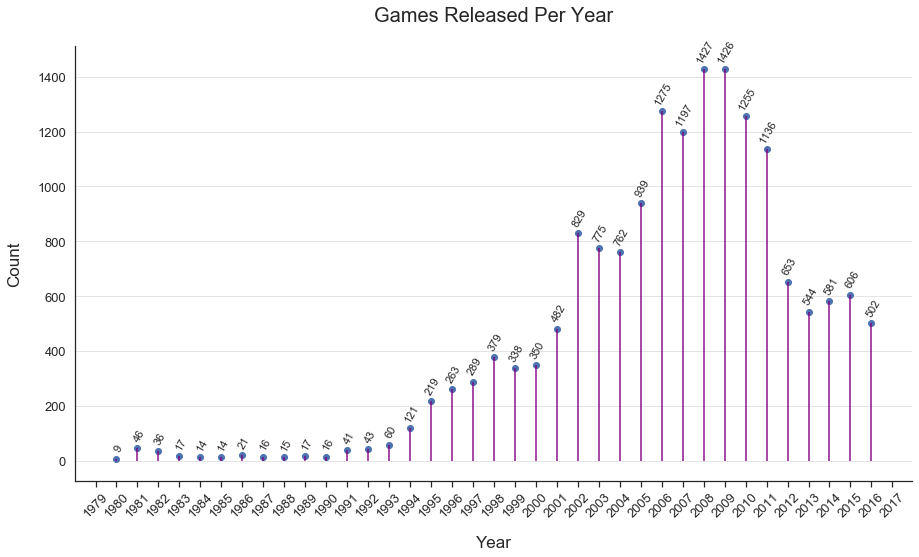

In [140]:
#Intializing figure with one axes
fig, ax = plt.subplots(figsize= (15,8))
#per year draw a line of which length is based on it's respective count 
ax.vlines(x =games_year['year_of_release'], ymin=0, ymax=games_year['name'], color='purple', alpha=0.7, linewidth=2)
#per year draw a circle based on it's count'
ax.scatter(x =games_year['year_of_release'], y=games_year['name'])

#ticks
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) #this locator puts ticks (here xticks) at regular intervals
ax.tick_params(axis='x', rotation=45)#rotate tick labels on for x axis only
plt.yticks(fontsize= 13) #font size for ytick labels
ax.tick_params(axis='both', labelsize=  13, bottom=True) #font size for both tick labels

#text 
for row in games_year.itertuples(): #get year and count to plot 
    ax.annotate(round(row.name, 2),(row.year_of_release, row.name), fontsize=11,xytext=(2,5),ha='center',va='bottom', rotation =60,textcoords='offset points') 

#additional modifications
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.grid(axis='y', alpha=.5) #show grid lines for y axis

#titles
plt.title('Games Released Per Year', fontsize=20, pad =25)
ax.set_xlabel('Year', fontsize=17, labelpad=15)
ax.set_ylabel('Count', fontsize=17, labelpad=15)

plt.show()

As we saw previously in the first step, most of our the games from the dataset were released during the years 2002 to 2011 with such years seeing a release of 800 or more games. However, such releases have been in a decline in recent years. Many reasons could have occured for this, so we'll keep exploring for now. 

We'll keep the distribution in mind later when deciding which years will be of interest for further exploration. Now, we shift our attentions to our dependent variable: sales. We'll start by seeing how sales varied from platform to platform. We'll take the mean total of each platform and then convert them into z-scores which will tell us how much standard deviaions they deviate from the sample's aggreagat mean (which will be 0). 

In [141]:
#group total column by platform, get aggregate mean, and sort it in ascending order
platform_sales = games[['total', 'platform' ]].groupby('platform').mean().sort_values('total').reset_index()
platform_sales['Zsales'] = round((platform_sales['total'] - games['total'].mean()) / games['total'].std(), 3)

We now use the variable created to visualize the mean global sales z-score of each platform in relation to the overall mean global sale. 

0.5333147848980568


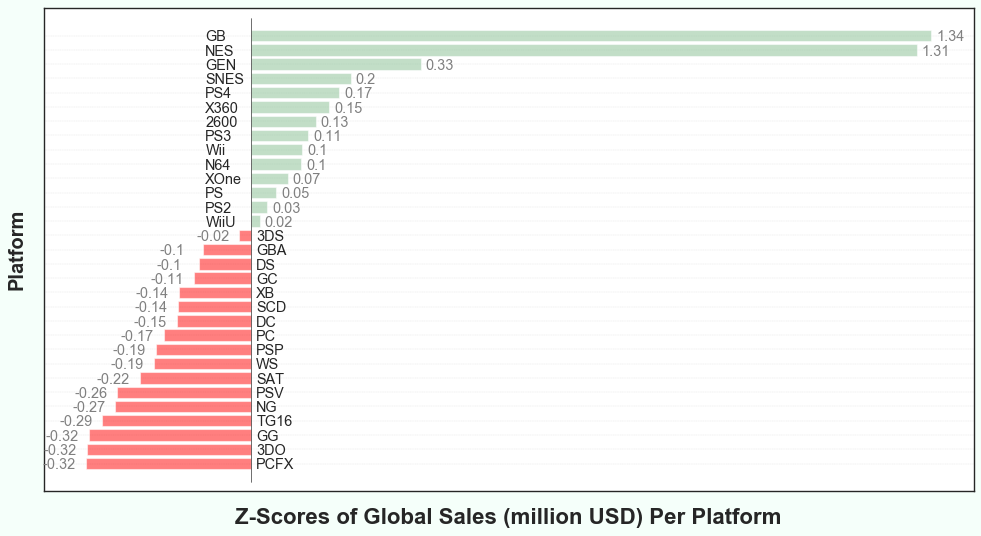

In [142]:
print(games['total'].mean())

# Setting the figure size and color
fig, ax = plt.subplots(figsize=(15,8), dpi=80, facecolor='mintcream')
color = ['#86bf91' if i > 0 else 'red' for i in  platform_sales['Zsales']]

#plotting settings
ax.barh(platform_sales['platform'],platform_sales['Zsales'],color =color,zorder=2,alpha=.5)
plt.axvline(color='black', lw=.5,ymin =.02, ymax =ax.patches[-1].get_width()-.36)  

#tick and grid settings
plt.grid(axis='y',linewidth=.3,alpha=0.75, linestyle='--')
ax.tick_params(top=False, bottom=False, left=False,right=False, labelleft=False, labelbottom=False)          
    
#text
for i in range(len(platform_sales)): 
    #annotate the normalized global sales per platform
    ax.text(x= [ax.patches[i].get_width()+.01 if platform_sales['Zsales'][i] > 0 else ax.patches[i].get_width() -.085][0] ,\
            y= ax.patches[i].get_y(),s = str(round(ax.patches[i].get_width(),2))  , fontsize=13,color='gray')
     #place custom platform labels 
    ax.text(x=[-.09 if platform_sales['Zsales'][i] > 0 else 0.01][0],\
             y=ax.patches[i].get_y(), s=platform_sales['platform'][i], fontsize=13)

#titles
ax.set_ylabel('Platform' ,weight='bold',labelpad =15, size=18)
ax.set_xlabel('Z-Scores of Global Sales (million USD) Per Platform' ,weight='bold',labelpad =15, size=20)

plt.show()

Our results show GB and NES as the top performing platform falling around 1.3 standard deviations above the aggregate yearly mean of \\$533,000. They are followed by other platforms whose highest z-score falls .33 standard deviations away from the mean. Suprisingly, the new platforms did not place higher as expected. A possible reason might be due to marketshare of platforms over the years; where GB and NES faced little competetition and thus had more control over the market. 

To explore the aforementioned hypotheses  let's create a line chart for the top 4 performing platforms to observe their median sales per years that they were active in.

In [143]:
def example_plot(ax, data, columns, color, title, agg):
    #base plotting
    df = data.query("platform == @title").groupby(columns[0]).agg(agg).reset_index()
    ax1 = df[columns].plot(kind='line', x=columns[0], y=columns[1], ax=ax, color=color,marker='o',fontsize=14,zorder=2,legend=False)
    
    #tick settings
    plt.xlim(df[columns[0]].min(), df[columns[0]].max())
    ax.tick_params(axis='x', rotation=45, bottom=True)
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
  
    #additional settings
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y')
    
    #titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('{}'.format(title), {'fontsize':20}, pad=15)
   
    #text (displays last value)
    ax.text(x=list(df[columns[0]])[-1],y=list(df[columns[1]])[-1],s=round(list(df[columns[1]])[-1],2),fontsize=15,rotation=20)

Using the function create above, we'll plot the relevant line charts. 

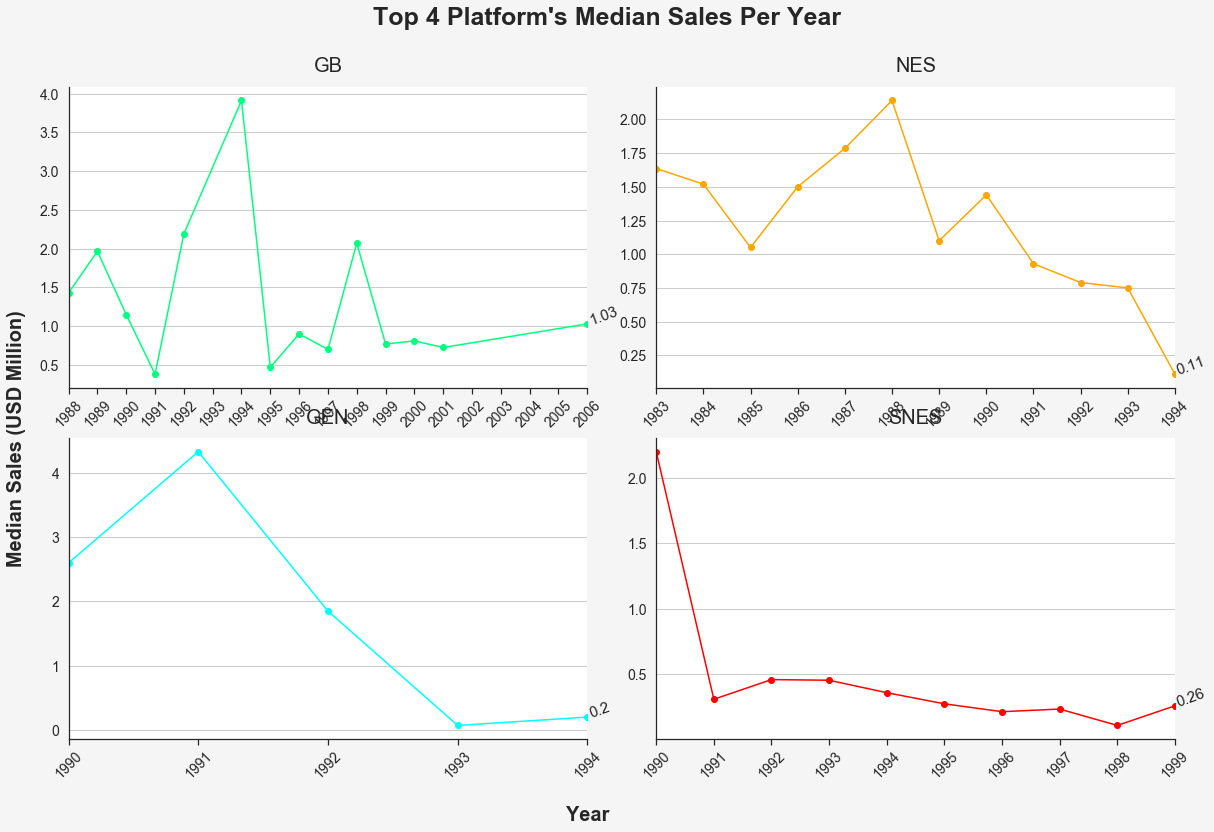

In [144]:
title= ['GB','NES','GEN','SNES'] #top performing platforms based on z-score
color = ['springgreen','orange', 'aqua', 'red'] 

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,9),constrained_layout =False, facecolor='whitesmoke')

for i in range(4):
    example_plot(ax.flat[i], games, ['year_of_release','total'],color[i], title[i], 'median')

#additional figure settings
ax.flat[2].set_ylabel('Median Sales (USD Million)', fontsize =20, labelpad=25, y=1,weight='semibold' )
ax.flat[2].set_xlabel('Year', fontsize =20, labelpad=25, x=1, weight='semibold')
fig.suptitle("Top 4 Platform's Median Sales Per Year",fontsize=25, weight='bold', y=1.17)
plt.tight_layout(pad=-5, w_pad = 0 , h_pad=-10)
plt.show()

Per the line charts, the platforms were predominately active in the early years of gaming with most having died off before the turn of the century. For the GEN and SNES platforms, sales seem to start of with high values and declined over the years while for the GB and NES had a moderate volatility in their median global sales. This provides some evidence for the hypothesis that due to there being less platforms and thus less competetion, most of these platforms enjoyed a bigger chunk of the total global market sales However, based on their last year present in the data, it seems like the aforementioned platforms are no longer relevant.

Do the aforementioned platforms still hold the highest position when we base it off the aggregate global sales over the years? To answer this question we'll follow the same procedure as above with the exception of grouping them by their sum instead of the median. 

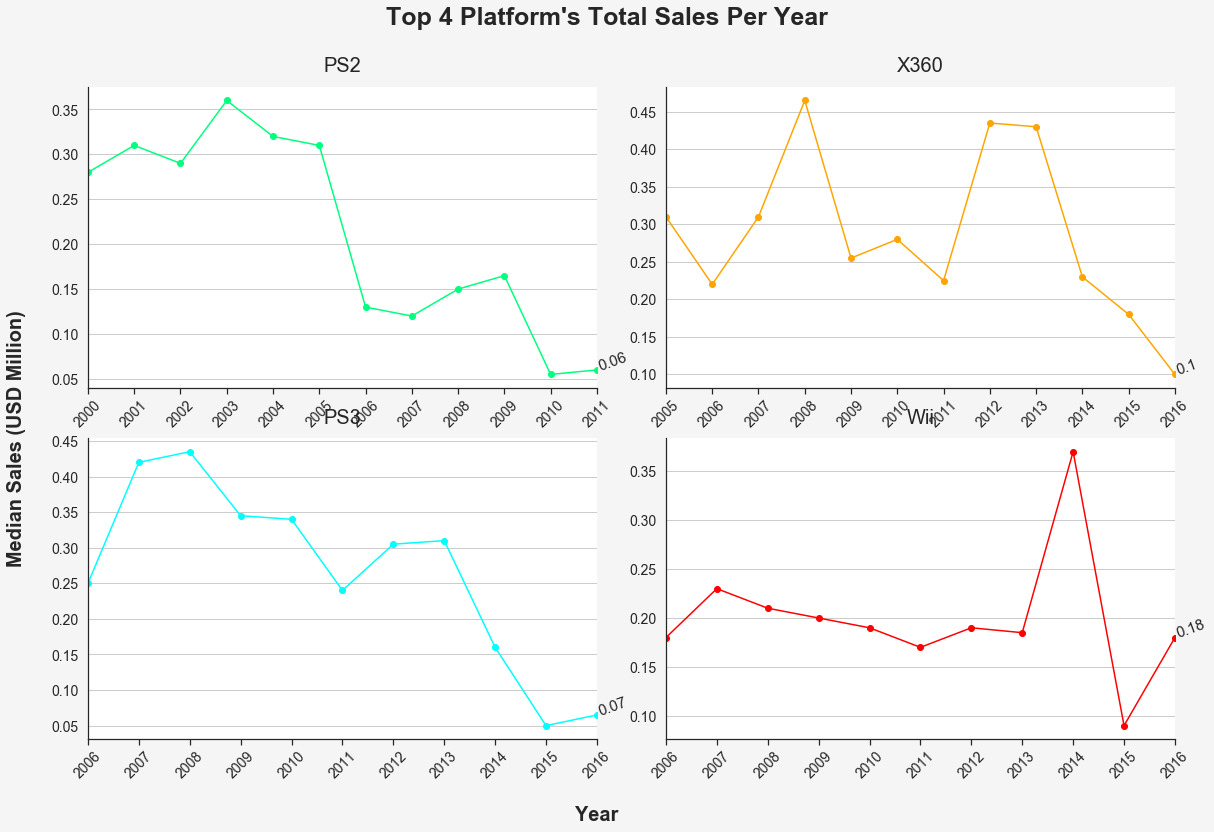

In [145]:
title= list(games[['total', 'platform' ]].groupby('platform').sum().sort_values('total', ascending=False).index[:4])
color = ['springgreen','orange', 'aqua', 'red'] 

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,9),constrained_layout =False, facecolor='whitesmoke')

for i in range(4):
    example_plot(ax.flat[i], games, ['year_of_release','total'],color[i], title[i], 'median')

#additional figure settings
ax.flat[2].set_ylabel('Median Sales (USD Million)', fontsize =20, labelpad=25, y=1,weight='semibold' )
ax.flat[2].set_xlabel('Year', fontsize =20, labelpad=25, x=1, weight='semibold')
fig.suptitle("Top 4 Platform's Total Sales Per Year",fontsize=25, weight='bold', y=1.17)
plt.tight_layout(pad=-5, w_pad = 0 , h_pad=-10)
plt.show()

Not suprisingly, recent platforms take the top positions in terms of their yearly total global sales. From the lollipop chart earlier, this most likely is due to the high amount of games released during recent years which explains the relatively high earning years and low selling later years (with the exception of the Wii platform). Another interesting point made by the chart is that the platforms share similar ranges going from a minimum of around \\$50 k to a maximum of \\$450k in yearly global sales. Despite being the yearly total sum, these numbers still fall below the sales we saw for the yearly medians of the older platforms. This might be due to earlier games being sold at a higher price and//or the differences in the share of the market between the two groups. 

Based on the differences we've seen so far in terms of yearly global sales per platform,two questions arise:
<ul>
    <li> Which previously popular platforms have died out? </li>
     <li>How long does it take for platfrom to die out and/or appear?</li>
</ul>

 We'll start answering the above questions by using the joypy library to plot a joyply plot to show the distribution of years per platform in relation to each other. 

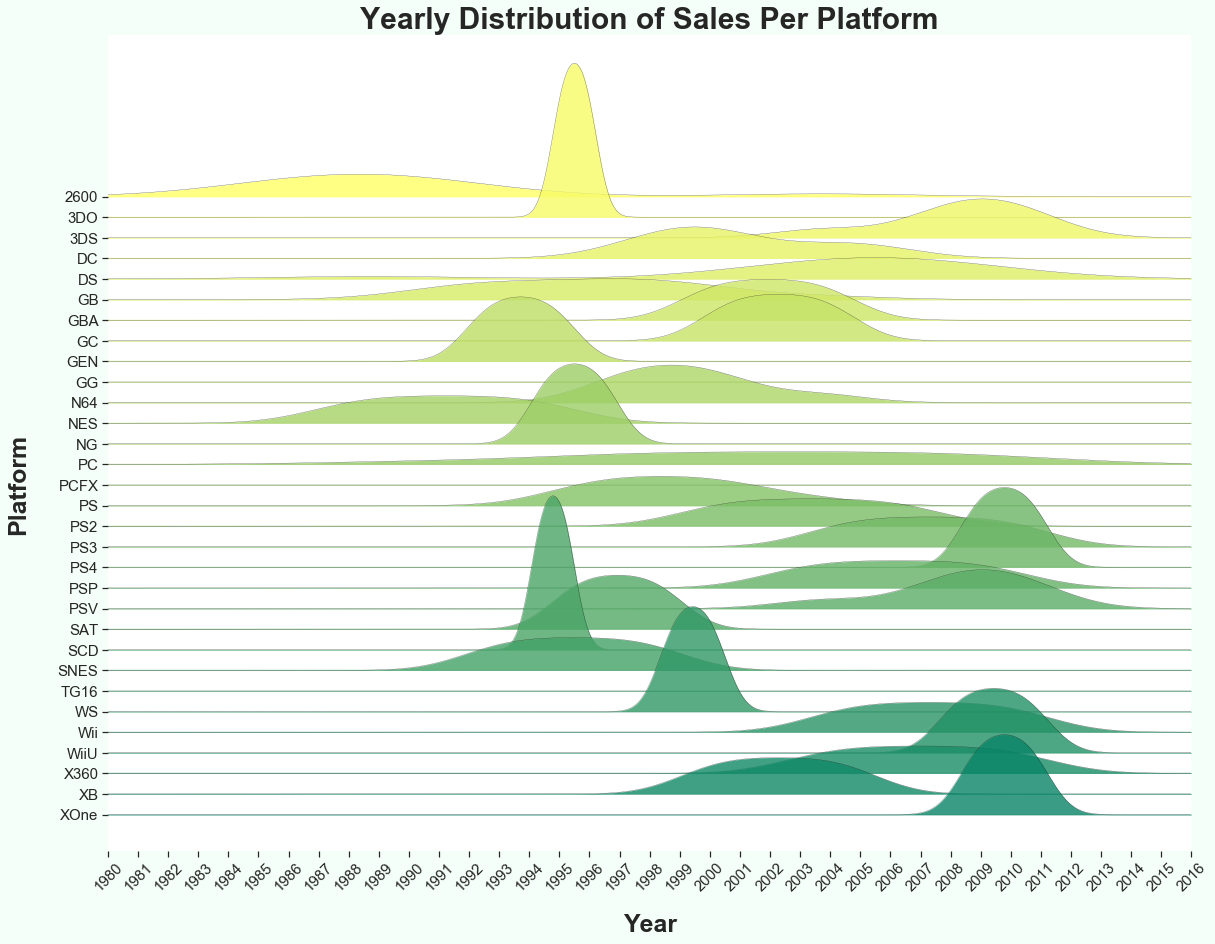

In [146]:
fig, axes = joypy.joyplot(games.groupby(['year_of_release', 'platform']).count().reset_index(), by='platform', \
                          column=['year_of_release'],figsize=(16,12), #group by count
             linewidth=0.3, overlap=3,alpha=.8, colormap=mpl.cm.summer_r)
fig.set_facecolor('mintcream')

#tick settings
plt.xlim(1980, games.groupby('year_of_release').count().index[-1]) #x-axis tick ranges
[axes[i].tick_params(reset=True,axis='both',labelsize=15,top=False,right=False) for i in range(len(axes))]
axes[-1].tick_params(axis='x',rotation=45) 
axes[-1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))#intervals for x-axis (year)

#titles
plt.title('Yearly Distribution of Sales Per Platform', size=30, weight='bold')
axes[17].set_ylabel('Platform', labelpad=40, fontsize=25, weight='semibold')
axes[-1].set_xlabel('Year',labelpad=20, fontsize= 25, weight='semibold')
plt.show()

From the graph, it now is evident that most marketshare may have taken a role in the mean scores for the platforms. There were very few active platforms between the years to 1992, which is where the top Z-scores platforms were active. In addition, we can also observe that from the mid 90s to the year 2000, most platforms lasted for only 4 years before dying off. This pattern changed following the previously mentioned years, with most lasting a span of around 7 years. However, it looks like not many platforms survived after the 2007. In addition, we can also see that many platforms emerged during the 2000s which may explain the increase of total games released per year as one unique game had  more versions of platforms to release in.

To get a more accurate view of possible factors affecting sales (dependent variable), we'll focus on relevant years where most platforms sprang up. Based of the chart, we'll choose the year 1996 as the cutoff point.  

In [147]:
select_years = games.query("year_of_release >= 1996").reset_index()

For this, we'll create a pivot table that will dispaly total sales for each platform for the available years(1996 to 2016). However, given the different ranges of years active for the platforms, we'll fill in the pivot table with 0 to represent non-existing values. We'll also make two dictionaries that contain the mins and max for each platform to show the years that the platforms existed. Lastly, we'll take the names of the platforms that have a total sum of more than 100 million as potential platforms to look further into-- indications of a successful platform from the given years. 

In [148]:
#before filling in missing values with 0
select_years[['platform','total','year_of_release']].pivot_table(\
                                        index='year_of_release',values='total', columns='platform',aggfunc='sum')[:4]

platform,2600,3DS,DC,DS,GB,GBA,GC,N64,NG,PC,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,36.03,NaN,NaN,34.10,0.1,10.58,...,NaN,NaN,7.69,15.92,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,6.37,NaN,NaN,39.50,NaN,11.27,...,NaN,NaN,6.77,0.99,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.38,NaN,26.90,NaN,NaN,49.24,NaN,3.26,...,NaN,NaN,3.82,0.22,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,5.16,NaN,38.00,NaN,NaN,57.87,NaN,4.74,...,NaN,NaN,0.09,0.26,0.46,NaN,NaN,NaN,NaN,NaN


In [149]:
#to use to plot
x = select_years[['platform','total','year_of_release']].pivot_table(\
                                        index='year_of_release',values='total', columns='platform',aggfunc='sum')
x =x.fillna(0) #for non-existing years

#to mark the min and max years for each platform
maxes = dict(select_years.groupby(['platform','year_of_release']).count().index)
mins = dict(sorted(list(select_years.groupby(['platform','year_of_release']).count().index), key = lambda t: t[1], reverse=True))

#to highlight platforms of interest (> 100 mill in aggregate sales)
interest = list(select_years.groupby('platform').sum().query("total > 100").index)
index =[a for a,b in enumerate(x.columns) if b in interest] 

Armed with the aforementioned variables, we can now plot out the distribution of total sums sales per year represented by bubble plots.  

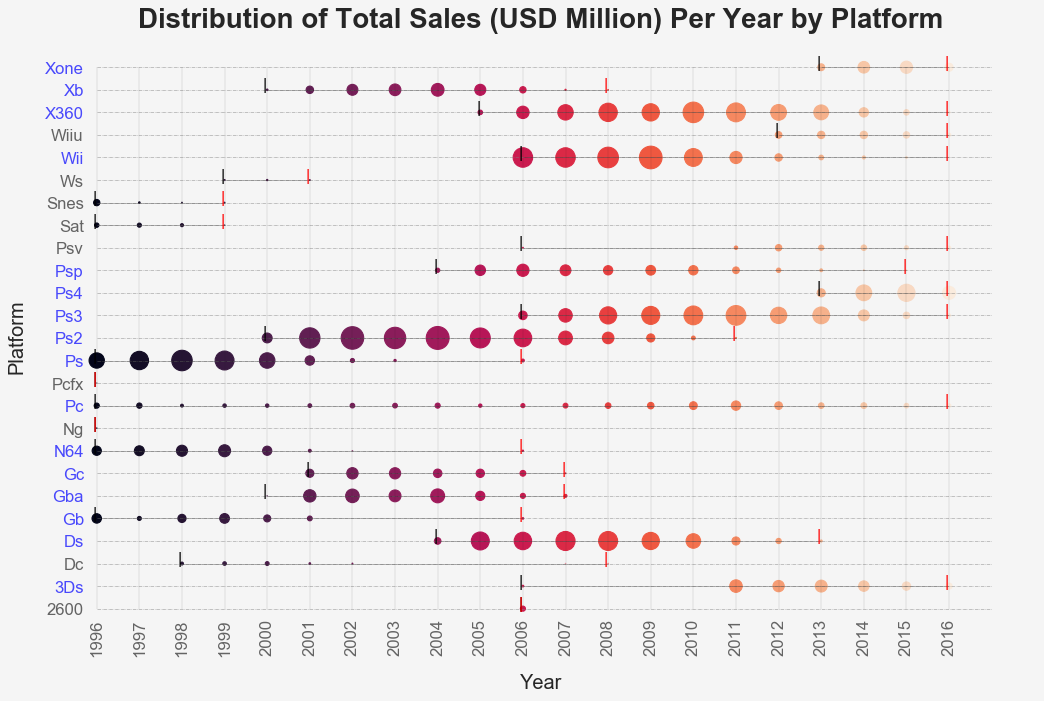

In [150]:
#main plot settings
fig, ax = plt.subplots(figsize=(16,10), dpi= 80, facecolor='whitesmoke')
ax.hlines(y=x.columns, xmin=x.index[0], xmax=2017, color='gray', alpha=0.8, linewidth=.5, linestyles='dashdot')

#bubble markers and min and max annotation for each platform
for make in x.columns:
    df = x[make] #platform of interest
    s_linear = [2*n for n in list(df.values)] #bubble size
    ax.scatter(y=np.repeat(make , len(df.index)), x=df.index, s=s_linear, c= np.linspace(0,1,21)) #bubble plot
    ax.text(x= mins[make]-.1, y=make, s='|', fontsize=15, color='black') #annotate min 
    ax.text(x= maxes[make]-.1, y=make, s='|', fontsize=15, color ='red') #annotate max
    plt.hlines(make,mins[make], maxes[make], linewidth=.8, alpha =.3 )#draw lines to join min and max markers 

#ticks labels & marker settings
for i in index: #text
    ax.get_yticklabels()[i].set_color('blue') #turn label blue if sales higher than 100
plt.xticks(x.index) #set x axis range
plt.tick_params(axis='both',which='both',bottom=False, left=False, labelsize=15) # labels along the bottom edge are off
ax.set_xticklabels(x.index, alpha=0.7, rotation=90, y=.05) 
ax.set_yticklabels(x.columns.str.title(), alpha=0.7,x=.05 )

#additional settings
ax.vlines(x=x.index,ymin= x.columns[0],ymax= x.columns[-1], linewidth=.3, alpha =.3) #custom grid settings
plt.box(False)
ax.set_title('Distribution of Total Sales (USD Million) Per Year by Platform', fontdict={'size':25, 'weight':'bold'})
ax.set_ylabel('Platform', labelpad=16, fontsize= 18)
ax.set_xlabel('Year', labelpad=16, fontsize= 18)

plt.show()

We can observe that between the years 2006 to 2008, many platforms died off. Several reasons may have led to this including the recession and in particular for the year 2006; the year which was used to fill in the null values for the year column in the preprocessing step. In addition, platforms starting from the PS2 and below seem to have been active in the first half of the existing years but have slowly died off. While the other half, seems to consist of recently new platforms and in comparison to the first half, with much more platforms. Again, it does seem to suggest the median sales of these new platforms. With a general understanding of the yearly patterns, we'll proceed to focus on platforms that were active up to the max year in the dataset as well as have an aggregate of over 100 million dollars:
<ul>
    <li> XONE</li>
    <li>X360</li>
    <li> PS4</li>
    <li>PS3</li>
    <li>PC</li>
    <li> 3DS</li>
 </ul>


In [151]:
platforms=  select_years[select_years['platform'].isin(['3DS','PC','PS3','PS4','X360','XOne'])]

Let's compare the global sales per platform via a boxplot.

In [152]:
def box(df, x, y):
    #main plotting
    sns.set(style="white")    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,7),constrained_layout=True, facecolor='whitesmoke')
    sns.boxplot(x=x, y=y, data=df,notch=True, palette =sns.husl_palette(8, l=.9, s=.9))
    sns.stripplot(x=x, y=y, data=df,color='orange', size=2, jitter=1)#show distribution of observations
    
    #positions to annotate calculated median and count values
    medians = df.groupby([x])[y].median().round(2).to_dict() #median values
    posi = df.groupby([x])[y].max().to_dict() #max values for positioning counts values
    count = df.groupby([x])[y].count().to_dict()#count values

    #text 
    for i in range(len(medians)):
        #median text annotation
        ax.text(i, medians[ax.get_xticklabels()[i].get_text()]+((medians[ax.get_xticklabels()[i].get_text()]*.2) \
                        / len(medians)), 'M:'+str(medians[ax.get_xticklabels()[i].get_text()]),
        horizontalalignment='center', fontsize=14, color='darkslategray',fontweight='bold')
        #size text annotation
        ax.text(i, posi[ax.get_xticklabels()[i].get_text()]+(posi[ax.get_xticklabels()[i].get_text()]*.20), \
            'n: '+str(round(count[ax.get_xticklabels()[i].get_text()],3)),
        horizontalalignment='center', fontsize=14, color='darkcyan',fontweight='bold')
    for i in range(len(df[x].unique())-1):
        plt.vlines(i+.5, -10, 45, linestyles='solid', colors='gray', alpha=0.2) #custom grid line on y axis
    
    #ticks
    ax.set_yscale('log') #given outliers present in df set to log scale
    ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter()) #set back to normal 
    ax.tick_params(axis='both',bottom=True, left=True, labelsize=13)
    
    #additional settings 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #titles
    plt.title("Distribution of Sales by Platform", fontsize= 27,weight='bold', pad=20)
    plt.xlabel("Platform", fontsize='x-large', labelpad=15, fontweight='semibold')
    plt.ylabel("Sales (USD Million)", fontsize= 'x-large',labelpad=15, fontweight='semibold')
    
    plt.show()

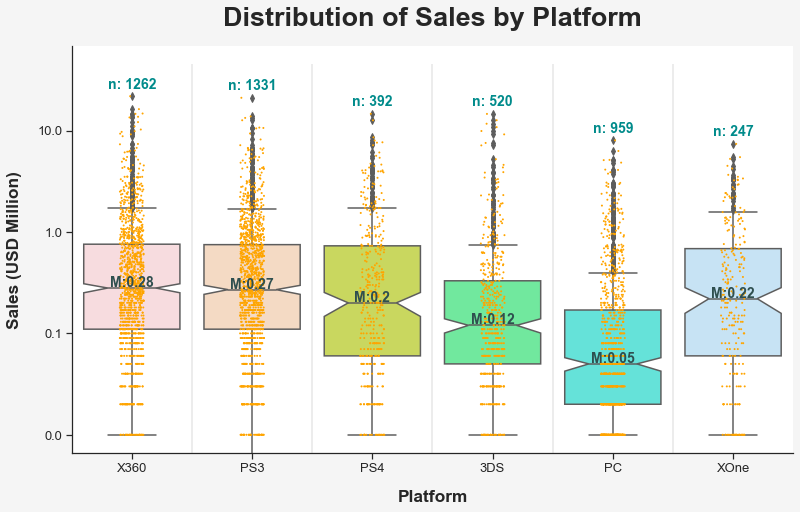

In [153]:
box(platforms, 'platform','total')

To start, it should be mentioned that due to the outliers--where some games yearly sales were way above the median--a log scaled box plot was created.From the graph, X360 and PS3 platforms as well as their recent contemporaries, XONE and PS4, respectively, share similar interquantile ranges; where around 50% of their respective data falls in the 100,000 to 1 million dollars in yearly sales.The result makes sense as the aforementioned platforms are the most popular ones in the current times. In addition, the 3DS platform seems to be less profitable in comparison to it's recent counterparts. Lastly, the PC platform seems to be the less profitable out of all of them with a significant lower median (around 50,000) than the others. This may be due to the prices of games though.

 Let's check out how this looks for only games that yielded a yearly sales of above one million dollars. 

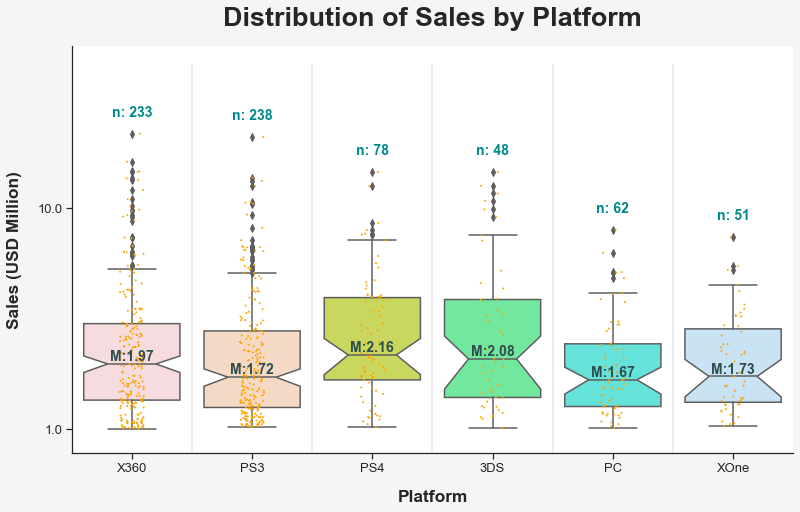

In [154]:
df = platforms.query('total >1')
box(df,'platform','total')

In comparison to the other platforms, the PS4 and 3DS platforms seem to fair more better in terms of their distributions of games that sold above the one million dollar mark; the X360 platform fell cloely behind with a median sales of 1.97 million dollar. The other platforms seem to share common median which fall between the ranges of 1.67 to 1.73 million dollars. It should be noted that these distirbutions might have been affected by their present total count.

To get a better sense of the total sales by platform, we'll create a pivot table of their mean z-scores to see if we can get some further insights.

In [155]:
means =platforms[['total', 'platform']].pivot_table(index='platform', values=['total'], aggfunc=['mean'])
reg =platforms['total'].mean()
zmeans = [means.index[i] +': ' + str(round([means.iloc[i] - reg][0][0],2)) for i in range(len(means))]

In [156]:
reg, zmeans

(0.6119422627892412,
 ['3DS: -0.11',
  'PC: -0.36',
  'PS3: 0.09',
  'PS4: 0.19',
  'X360: 0.16',
  'XOne: 0.03'])

In relation to the aggregate mean (around \\$612,000), PS4 and X360 platforms take the lead in terms of their standard deviation away from the yearly mean. Which are then followed by the PS3 and XONE platform. The other platforms, 3DS and PC seem to be fairing worse than the aggregate yearly mean as indicated by their negative z-score. A thing to note here is the inverse relationship between the X360 and PS4 platforms; where the X360 performed better than it's recent contemporary (XONE) in terms of profit sales and in comparison to it's counterpart, the PS3 (PS4 for XONE). 

Since we're interested in the current trend, we're going to investigate the PS4 platform further. In particular, per the company's order, we'll investigate the relationships, if any, that user and critic scores have on the yearly sales. 

We'll select the relevant columns and save it to a new dataframe. From there, we'll also retrieve the outliers based on a threshold of a z-score of 3; where relative to the aggregate mean, values falling 3 standard deviations above are labeled as outliers. This will be used to highlight the oultiers in the scatterplot.

In [157]:
platform = platforms.query("platform =='PS4'")[['critic_score','user_score','total','name']]
z = np.abs(st.zscore(platform[['total']])) #this is wrong
outliers = platform.query('total > 3')[['user_score','critic_score','total']]

In [158]:
z[:5]

array([[8.60308852],
       [7.35262356],
       [4.83925118],
       [4.46597806],
       [4.26689906]])

Now let's use a scatterplot to visualize the relationships between the two variables. 

C:\Users\garci\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


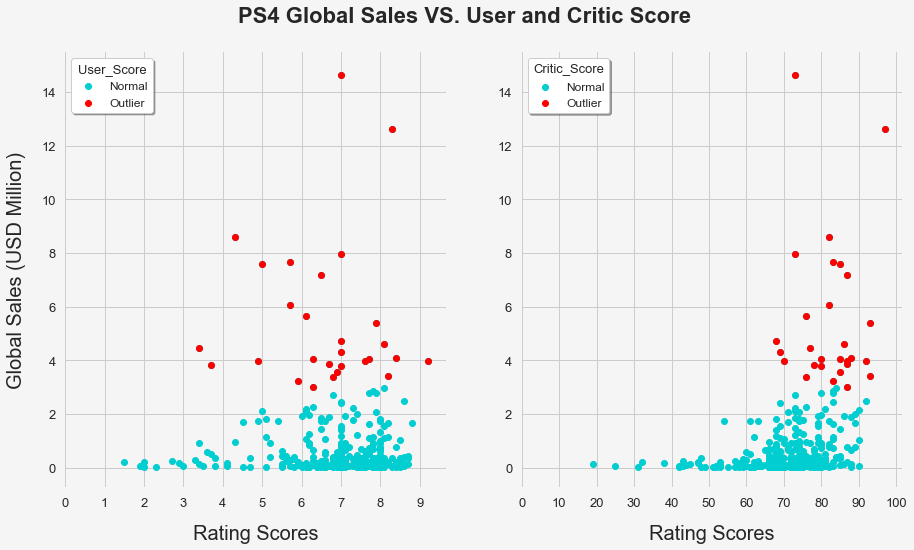

user_score     -0.068051
critic_score    0.351408
Name: total, dtype: float64


In [159]:
#initializing axes and figures
subs= ['user_score','critic_score']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8),constrained_layout =False,facecolor='whitesmoke')

for i in range(2):
    #plotting 
    ax1= ax[i].scatter(subs[i], 'total', data=platform, color="darkturquoise")
    ax2 =ax[i].scatter(outliers[outliers.columns[i]], outliers['total'] ,color="red")
    
    #tick settings
    ax[i].set_yticks(np.linspace(0, platform['total'].max(), dtype=int))
    ax[i].set_xticks(np.linspace(0, platform[subs[i]].max(),dtype=int))
    ax[i].yaxis.set_major_locator(mpl.ticker.MultipleLocator(2)) #y tick intervals for both axes 
    
    #conditional settings
    if i == 0:#left axes
        ax[0].set_ylabel('Global Sales (USD Million)', labelpad=15, fontsize=20) 
        ax[0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(1)) #for x axis user score
    if i ==1:#right axes
        ax[1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(10)) #for x axis critic score
        plt.title('PS4 Global Sales VS. User and Critic Score',size=22,x =-.15,pad=30, weight='bold')
    
    #additional settings
    ax[i].set_frame_on(False)
    ax[i].legend(platform[subs[i]], labels=['Normal','Outlier'],loc='upper left',fancybox=True,\
                 fontsize=12, title=subs[i].title(),handlelength=2,shadow=True,title_fontsize=13)
    ax[i].set_xlabel('Rating Scores', labelpad=15, fontsize=20) 
    ax[i].tick_params(which='both',labelsize=13,grid_visible=True, color='black')
    
plt.show()
print(platform[['user_score','critic_score','total']].corr()['total'][:2])

A small positive linear association (r=.351) was found between rating scores and global sales ; no association was found for user scores. Possible follow ups should be done to investigate further the association between global sales and rating scores. Lastly, it should be noted here that the methods used to fill in the null values in the columns may have impacted this. 

Let's now look at how the games in the PS4 platform differ in other platforms. We'll create a list of unique values and save it to a variable key which will then be used as the filter condition. 

In [160]:
keys = list(platform.name.unique())

In [161]:
select_games = platforms[platforms['name'].isin(keys) ==True]
keys[:3]

['Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'FIFA 16']

Now let's plot the distribution. 

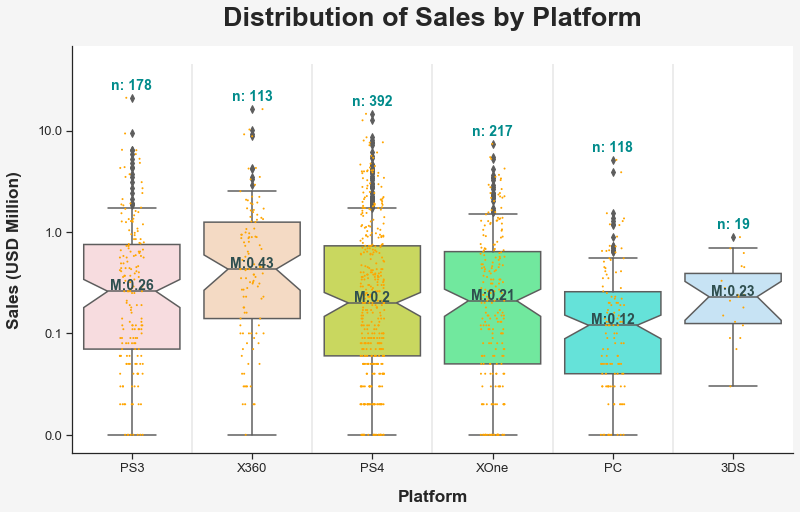

In [162]:
box(select_games, 'platform','total')


 When we consider only the global yearly sales for the select games present in the PS4 platform, a more evident differences can be seen amongst the platforms. The platform X360, yields the most sales and in terms of the median (\\$430,000), trumps the others in which the next platforms closest median falls \\$170,000 less than it. Overall though, it look like the PS3 and XONE in relation to the PS4 platform seem to contain similar distirbution in terms of their sales. The other platforms, yet again, seem to fall way below the other's sales. Many reasons can be explanations but given the correlations found earlier, one possible factor may be the critic score.


Could genre be a factor impacting global sales? We''ll use a joyplot to visualize the distribution of global sales by genre to providen an initial answer to this question.

In [163]:
def settings(axes, data,xmin):
    for i in range(2):
        #tick settings
        plt.xlim(xmin,data['total'].max())
        axes[-1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(1+i))
        [axes[i].tick_params(reset=True, axis='both',labelsize=15,top=False) for i in range(len(axes))]
        
        #title settings
        plt.title('Distribution of Global Sales by Genre', size=35,weight='bold', y=.9)
        axes[5].set_ylabel('Genre', labelpad=40, fontsize=20)
        axes[-1].set_xlabel('Global Sales (USD Million)',labelpad=20, fontsize= 20)

Let's use the function created earlier to display the visualizations.

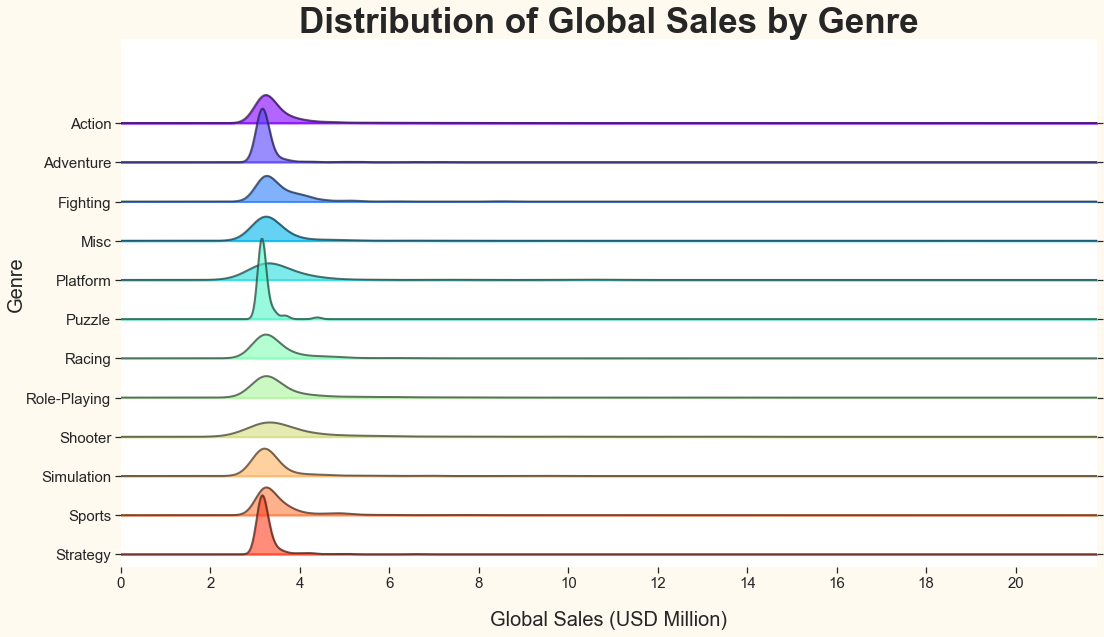

In [164]:
fig, axes = joypy.joyplot(platforms, by='genre', column=['total'],figsize=(15,8),
             linewidth=2, overlap=1, colormap=mpl.cm.rainbow, alpha=.6)
fig.set_facecolor('floralwhite')
settings(axes, platforms, 0)
plt.show()

Outliers seem to have affected the display of the graph. The genres puzzle, strategy,and fighting show high peaks indicating that many values fall around it's median. To get a more clearer understanding we'll create a pivot table to observe for differences, if any, among the yearly globals sales per genre.

In [165]:
print(platforms.pivot_table(index='genre', values='total', aggfunc=['mean', 'median',np.std,len]).sort_values([('mean', 'total')], ascending=False))

                  mean median       std     len
                 total  total     total   total
genre                                          
Shooter       1.114595  0.340  2.222784   592.0
Role-Playing  0.701863  0.200  1.424818   451.0
Platform      0.700847  0.235  1.490085   118.0
Sports        0.630474  0.260  1.009525   591.0
Fighting      0.596541  0.330  0.835510   185.0
Action        0.592597  0.210  1.291118  1290.0
Racing        0.579870  0.190  1.202546   307.0
Misc          0.466349  0.160  1.370409   367.0
Simulation    0.455197  0.110  1.081549   229.0
Strategy      0.220885  0.050  0.499325   260.0
Adventure     0.217208  0.050  0.597330   265.0
Puzzle        0.142143  0.050  0.279400    56.0


When sorted in ascending order based of the mean values, we can observe that shooter games have highest yearly sales,at about \\$ 1.1 million dollars. The next highest profitable genres, role-playing and platform, fall around \\$ 400,000 short from the shooter genre. However, this is changes slightly when we compare the means, where action takes the lead in highest profitable platform followed closely by the shooter genre. Overall though, games in the shooter genre tend to yield the highest sales. Laslty, strategy, adventure, and puzzle games seem to sell the least as indicated by both their means-- \\$ 220k, \\$217k, and \\$ 142k, respectively--and median (\\$50k for the three). 

However, given the outliers seen in the joyply, can we generalize the above results to games with high sales, as defined by having a yearly global sales of more than 2 million? We'll create another joyply to get some insights to answer this question. 

In [166]:
high_earners = platforms.query('total >=2')

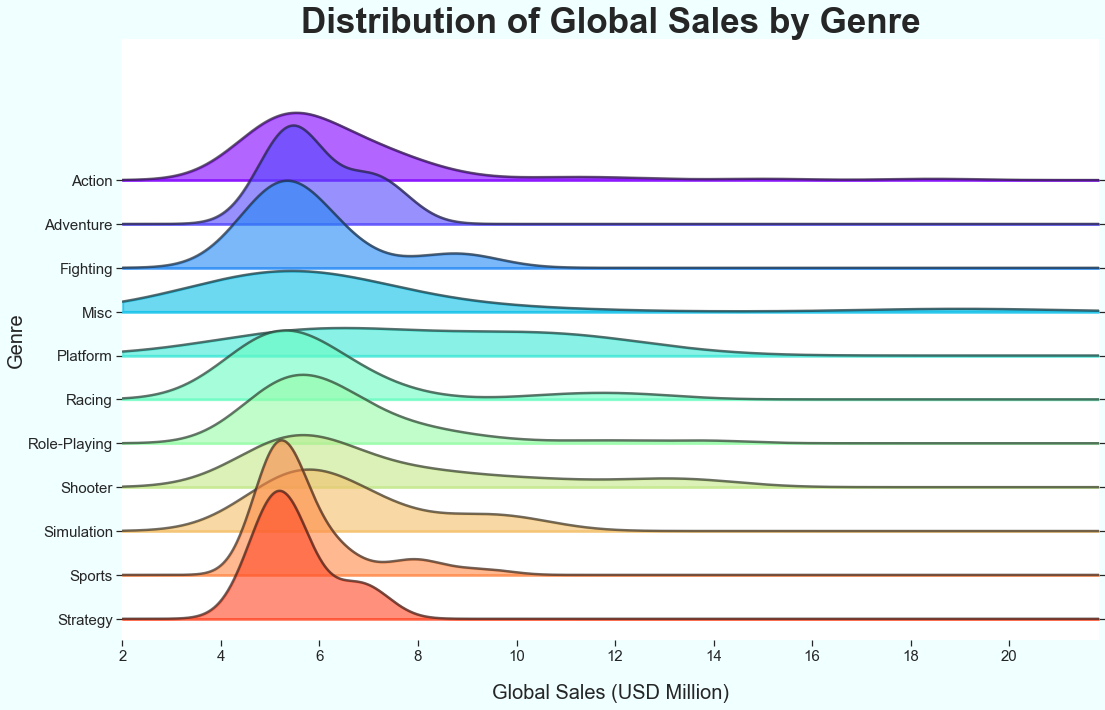

In [167]:
fig, axes = joypy.joyplot(high_earners, by='genre', column=['total'],figsize=(15,9),
             linewidth=2.5, overlap=2, colormap=mpl.cm.rainbow,alpha=.6)
fig.set_facecolor('azure')
settings(axes, high_earners, 2)

From the chart we can see some differences amongst certain genres's yearly global sales distribution. In particular, platform and miscallenous genres have the most widespread distirbutions spanning from 2 to 12 million dollars. On the other hand, the sports and strategy genres have the longest peaks with most of it's sales falling between the 4 to 7 million dollar range. Other genres,seem to follow similar distributions. Lastly, most genres contain a mid-large tail that is skewed to the right. Latly, we also can note that the puzzle genre didn't make the cut as it had no games that had sales at or above the 2 million dollar threshold. 

Like the overall genres dataframe, we'll create a pivot table to get further insights.

In [168]:
print(high_earners.pivot_table(index='genre', values='total', aggfunc=['mean', 'median',np.std,len]).sort_values([('mean', 'total')], ascending=False))

                  mean median       std   len
                 total  total     total total
genre                                        
Platform      6.498000  5.820  3.732696   5.0
Shooter       5.368049  3.730  3.659912  82.0
Simulation    4.430000  3.760  2.293242  11.0
Misc          4.380588  2.660  4.837576  17.0
Role-Playing  4.248049  3.440  2.612378  41.0
Action        4.236506  3.380  3.081618  83.0
Racing        3.696818  2.560  2.769479  22.0
Adventure     3.618333  3.100  1.261292   6.0
Fighting      3.400000  2.815  1.797554   8.0
Sports        3.276538  2.645  1.507726  52.0
Strategy      2.956000  2.620  1.085417   5.0


The output shows somewhat different seen in the overall population sample. Platform takes the lead generating a mean of \\$6.50 million dollars followed by shooter games at \\$5.37 million dollars in average global sales. Simulation, Misc, Action, and Role-playing performed in the average with means in the 4 million range. The high peaks from the chart, sports and strategy genres, have the lowest mean at \\$3.28 and \\$2.96 million dollars, respectively.

### Conclusion

Many insights were found in this step. We saw that most of the games from the dataset gradually increased over the years, was centered between the years 2002 to 2011, and suprisingly, saw a decline in games released after the year 2011. When assessing for the top platforms based on their Z-scores, old platfroms took the top four position, but were shown to be most inactive as most of their games ended during the late 90s, with one ending in 2006. When using the aggregate sum, recent platforms took the lead, however, it was show that their ranges at 50k to 450k was considerably less than the old platforms mean. Considering the years active between the two groups though, this is most likely due to the older platforms having a shorter 'lifespan' (why they didn't have the highest aggregate sum) and had less competition and thus more market share (higher yearly global sales). After further investigation, 6 platforms that were still active and had an aggregate sum higher than \\$100 million dollars where chosen. When looking at the top performing platforms from the six, the X360 and PS3 as well as their contemporaries (XONE and PS4), where found to share similar distributions as well as median; with the prior group having the highest average yearly sales followed by their respective contemporaries. When investigating for potential association amongst the user and critic scores against sales, critic score showed the only relationship (r=.35). Latly, when looking through genres, it was found that shooter, platform, and simulation genres were found to be the highest yielding genres; on the other hand, puzzle, adventure, and strategy games were found to be the least selling games as indicated by their median and average global sales.  

## User Profiles 

Let's now split up our data by regions, to see if there are any other interesting patterns that we can find. For each region we'll determine
<ul>
    <li>top five platforms</li>
    <li> top five genre</li>
    <li> top five selling games based on ESRB ratings</li>
    </ul>

In [169]:
regions = ['NA_sales','EU_sales','JP_sales'] 
platform_profile = []
genre_profile =[]
rating_profile =[]
#based on the median for each respective parameter
for i in regions:
    df = platforms.groupby('platform').median().sort_values(i, ascending=False).head()[i]
    platform_profile.append({i:df.to_dict()})
    df2= platforms.groupby('genre').median().sort_values(i, ascending=False).head()[i]
    genre_profile.append({i:df2.to_dict()}) 
    df3= platforms.groupby('rating').median().sort_values(i, ascending=False)[i]
    rating_profile.append({i: df3.to_dict()})

In [170]:
platform_profile

[{'NA_sales': {'X360': 0.17,
   'PS3': 0.12,
   'XOne': 0.12,
   'PS4': 0.06,
   '3DS': 0.01}},
 {'EU_sales': {'PS4': 0.08,
   'XOne': 0.07,
   'PS3': 0.06,
   'X360': 0.05,
   'PC': 0.03}},
 {'JP_sales': {'3DS': 0.05, 'PS3': 0.01, 'PS4': 0.01, 'PC': 0.0, 'X360': 0.0}}]

It's interesting to see how the NA and EU regions' top performing platform are the two platforms that were found to be of interest in our analyses step. Moreover, it can also be seen that NA takes a big share of the global sales, given their high median sales for the X360, PS3, and XONE which are about double the amount for the EU sales. On the other hand, the JP region has seen the most sales come from the 3DS platform with around 50k dollars. 

In [171]:
genre_profile

[{'NA_sales': {'Fighting': 0.16,
   'Shooter': 0.15,
   'Sports': 0.13,
   'Platform': 0.1,
   'Action': 0.09}},
 {'EU_sales': {'Shooter': 0.13,
   'Platform': 0.07500000000000001,
   'Fighting': 0.07,
   'Racing': 0.07,
   'Action': 0.05}},
 {'JP_sales': {'Role-Playing': 0.03,
   'Fighting': 0.02,
   'Action': 0.0,
   'Adventure': 0.0,
   'Misc': 0.0}}]

Fighting and shooter games seem to be the most popular for the EU and NA regions with sells well above the 100k mark. However, for the JP region, the top genres differ and are more diverse, with role-playing as their highest selling genre and followed by fighting games. This makes sense, given their top platform which is more likely to consist of such types of games. 

In [172]:
rating_profile

[{'NA_sales': {'K-A': 1.15,
   'M': 0.15,
   'E10+': 0.12,
   'T': 0.06,
   'EC': 0.045,
   'E': 0.04,
   'RP': 0.0}},
 {'EU_sales': {'M': 0.13,
   'E10+': 0.06,
   'K-A': 0.055,
   'E': 0.03,
   'RP': 0.03,
   'T': 0.03,
   'EC': 0.0}},
 {'JP_sales': {'E': 0.0,
   'E10+': 0.0,
   'EC': 0.0,
   'K-A': 0.0,
   'M': 0.0,
   'RP': 0.0,
   'T': 0.0}}]

Fromt the output, the JP region stick out. It maybe due to it's low count or to it's evenly distributed 0 values amongst the ratings given it a median of 0. As for the other regions, games with a K-A, M, and E10+ rating are the most sold games with K-A having the highest median sale for the NA region at 1.15 million. 

### Conclusion

User profiles were created for each region based on their top 5 performing platforms, genre, and ESRB ratings. Not suprisingly, the PS3,PS4, X360, and XONE, were found to be the highest selling platforms amongst the regions. The main difference was found in the JP region's top selling platform, the 3DS. This was later indicated by the genres, were the JP region had a more diverse top selling genres. This might be due to the platform that is used, as 3DS games may contain more types of games in the adventure and role-playing arena. Overall though, fighter and shooter games seem to be selling the most out of the types of groups of genre. Lastly, when looking at the ESRB ratings, the aforementioned results seem to be indicated again, as Mature ('M') and games for people aged 10+ (K-A and E10+) were the most popular.This makes sense as to why the fighter and shooter games were the most sold games for the EU and JP region. However, no such observations were found for the JP region as ESRB ratings were at 0 across all ratings. It may be their low count value may have played a role in this.

<a id='item 4'></a>
## 4. Hypotheses Tests

From our previous analysis, we saw indication in support for certain genres as well as platforms that seem to be the most popular and well-sold out of their associated groups. But is there a clear difference between them? To ensure that this is not so, we'll need to perform a statistical hypothesis test.The following are our hypotheses based on the data:
<ul>
    <li> <b>Average user ratings for XBOX ONE and PC platforms are the same</b> - saw earlier from the PS4 scatter plot that user ratings has no effect on sales and thus should have no effect between a recently new platform and old one</li>
    <li> <b>Average sales for and Shooter games and Sports are different</b> - a top selling genre should have a different average global sales when compared against a low-selling genre  </li>
    <li> <b>Average user ratings of the Action and Sports are different</b> -to observe if follow up should be done to observe impact of user ratings on genres </li>
 </ul>
For the hypotheses,  our assumptions for our sample size are the following: independent (two different platforms and genres) of each other, continous variables, and share a variable of interest (user ratings). As such, we'll be testing for the randomness in their difference by using the difference of two means for the two independent samples - - ttest. 
 

In [175]:
#first test parameters
xboxone = platforms.query("platform == 'XOne'")
pc =platforms.query("platform == 'PC'")

For the following tests we'll be using the de facto standard p-value of 0.05. Using this test, we'll set our null hypotheses to contradict the hypothesis that we set. This way we can assume that the opposite is true and see how likely the given data set is to be in the contradictory hypothese. Obtaining a p-value less than our threshold (0.05) would be grounds to reject the null hypothesis and thus suggest that theirs only a 5% chance of obtaining the observed data under the assumption that null hypotheses is true; this will in turn give us more confidence in the alternative hypotheses, which are the hypotheses that we have set out above. Lastly, since we are looking for equality (not < or >) in means for all the hypotheses, a two-sided test will be used for all of them.

Based on our samples, we'll be using the stats.ttest_ind scipy method to perform our hypothesis test for the last two hypotheses. For the first hypotheses, we'll be using the stats.ttest_1samp method to test against the known mean. We'll create a function for the two types of tests. Each will take the two parameters of interest and test under the alpha value of .05.

In [184]:
def ttest(data,data2):
    alpha = 0.05 #tolearnace for incorrectly rejecting the null hypothesis 
    results = st.ttest_ind(data, data2)
    print('p-value:', results.pvalue) #get corresponding p-value from t-test

    #< .05 chance of observing the same means(thus unlikely) given same population distribution  
    if (results.pvalue < alpha): 
        print('We reject the null hypothesis')
    else: #if alpha greater than .05 than the means are likely to be the same; fail to reject null
        print("We can't reject the null hypothesis")

Before proceeding, we'll check for homogeneity of variances to determine whether to use the Student's or Welch's t-test.This will be done using Levene’s test for homogeneity of variance via the stats.levene() method from the scipy library. The Levene's tests the null hypothesis that the paramters of interest are from populations with equal variances. So, a p-value less than .05 (threshold we'll have), will mean that it's very unlikely that the parameters have equal variances. We'll leave the default center, 'median', in place per the distributions seen earlier where outliers were present in them. 

In [177]:
print(st.levene(xboxone['user_score'], pc['user_score']))
print(len(xboxone['user_score']), len(pc['user_score']))

LeveneResult(statistic=4.311126638754485, pvalue=0.03807562975018709)
247 959


Given the resulting output (p < .03), there is a statistically significance in the variances amongst the two samples and thus a Welch's test will be done where the equal_var will be False instead of the default True argument.

Now time to test our hypothesis!

In [178]:
alpha = 0.05 #tolearnace for incorrectly rejecting the null hypothesis 
results = st.ttest_ind(xboxone['user_score'],pc['user_score'], equal_var =False)
print('p-value:', results.pvalue) #get corresponding p-value from t-tesst

# >.05 chance of observing the same means (thus 'likely') given same population distribution  
if (results.pvalue > alpha): 
    print('We reject the null hypothesis')
else: # p < .05, the means are UNLIKELY to be the same; fail to reject null
    print("We can't reject the null hypothesis")
print('XONE:',round(xboxone['user_score'].mean(),2),'\n','PC:' ,round(pc['user_score'].mean(),2))

p-value: 2.437627240081702e-06
We can't reject the null hypothesis
XONE: 6.71 
 PC: 7.14


The differences in the means are well below our threshold and thus is within the 'extreme' is in the extreme ends of the distirbution of the null hypothese making it unlikley to belong in it (it lands above the 97.5% or below the 2.5% of the distribution of the null hypotheses). So, suprisingly, there's a good chance of observing differences amongst the user scores between the two relatively new XONE platform and old PC platform. More follow-ups should be done to test this further.

Let's check the next hypotheses testing.

In [179]:
action =platforms.query("genre == 'Action'")
sports =platforms.query("genre == 'Sports'")

Again, the Levene's test for homogeneity of variance will be performed.


In [180]:
st.levene(action['user_score'], sports['user_score'])

LeveneResult(statistic=37.24898444369468, pvalue=1.2596447585514077e-09)

The test is not statsitically significant meaning there is homogeneity of variances. As such a Student's ttest will be calculated.

In [185]:
ttest(action['user_score'],sports['user_score']) 
print('Action:',action['user_score'].mean(),'\n','Sports:',sports['user_score'].mean())

p-value: 3.460227145475741e-20
We reject the null hypothesis
Action: 6.9180620155038826 
 Sports: 6.359560067681897


The average global sales between the Action and Sports genre are likely to come from different distributions, it seems likely now that user scores does differ depending on the genre and platfrom. What maybe the cause of this should be the topic of further investigation. 

Laslty, we're interested to see if the mean global sales differences seen between shooter games are statistically significant when compared to a lower yielding genre--sports. 

In [186]:
top =platforms.query("genre == 'Shooter'")
low =platforms.query("genre == 'Adventure'")
ttest(top['total'], low['total'])
print('Shooter:',top['total'].mean(),'\n','Sports:',sports['total'].mean())

p-value: 1.6848145528082365e-10
We reject the null hypothesis
Shooter: 1.1145945945945919 
 Sports: 0.6304737732656499


So, it now seems likely that genre, in particular for shooting games, will tend to yield the highest global sales in comparison to games in the sports genre. 

## Conclusion

The results from the test resulted in mixed expectations. The proposed hypotheses of user scores being the same for both the XBOXONE and PC was NOT able to be accepted given the low p-value(p < .001). In additon, this low p-value(p < .001) was seen in user scores and thus allowed for the rejection of the null hypotheses. Given the previous result, it'll be interesting to see how much of an effect that user score has on sales for a particular segment of genre and platforms. To further test this, we tested for potential differences in means for a top selling genre (shooter) and low selling-one (sports). The results, not suprisingly, was statistically significant (p < .001).

<hr> 
<a id='item 5'></a>
<h1> 5. General Conclusion </h1>

It was found that old platforms landed on the top four in terms of having the highest positive z-scores but this was not reflected in their aggregate total sales of which the top platforms for that measure were recent platforms (ie. PS4). It was indicated by the data that this most likley was due to lower games being sold as well a low amount of platfroms being active before the year of 1992 which was around the timeline of the old platforms. After around the year 2002, many platforms sprang up and explained why mean global sales fell drastically among the new platforms relative to the old ones. After further analyses, six potential platform were chosen to investigate factors that may predict future sales. Active and and aggregate of more than \\$100 million was the threshold set to retrieve platfroms that consisted of the DS, XBOX, and PS family, with a suprising anomaly in PC (relatively old platform). 

From further analyses, the X360, XONE, PS3 and PS4 were found to yield the highest median and average of yearly global sales. An inverse relationship was found where the X360 performed better than it's recent contemporary (XONE) in terms of profit sales when compared against the PS4; which performed better than it's previous contemporary (PS3) in having a higher global sale than the XONE. For the PS4 platform, when testing for associations between user score and rating scores against global sales, only a low positive linear relationship was found for critic scores vs yearly global sales(r=.35). No association (-.067) was found for the user score and yearly global sales. As for the genres, shooter, platform, and simulation games were found to be the top selling genre;  puzzle, adventure, and strategy games being the least profitable. Following that, region sales were split to asses and create a user profile for each based on their top five platform, genre, and ESRB ratings. The XBOX and PS family platforms were found to be in the top platforms across all regions. However, the 3DS was found to be most popular for the JP region. This was later indicated by the top performing genres in which JP region had a more diversse top selling genres that included a mixure of violence-adventure types of games. Overall tho, shooter fighter games were the most consistent selling games across the regions. Not suprisngly, this was seen in the top two rating for the EU and NA region where  Mature ('M') and games for people aged 10+ (K-A and E10+) took the lead. However, no such observations were found for the JP region as ESRB ratings were at 0 across all ratings.

To test for differences in means amongst user scores and genres a student's t-test was performed for three hypotheses. We were not able to provide support for the first hypotheses of the average user ratings being the same for the XBOX ONE and PC platforms (p < .001), which showed support of the means being different from each other. The second hypothese of user scores between the sport and action games having different average user ratings was found to be statistically significant (p <.001). It seems like user scores does differ among the aformentioned genres and platforms. This should be furthered investigated to see how that may affect sales for those specific genres. Lastly, an independent samples t-test showed statistical significant results in favor of our hypotheses of average global sales for the top-selling shooter genre being different from the low-selling adventure genre. 

Given our data, analyses, and hypotheses tests, there's a good likelihood of genres, platforms, and potentially user rating having an influence over future global sales. However, it should be noted that this is based of on the current data, the methods used, and the interpretation of the data. More in-depth follow up should be done. Nonetheless, the top 3 selling genre, X360 and PS4 seem likely to yield next year's highest global sales and should be of interest for the company. 